<center> <h1> <b>DATA AUGMENTATION<b></h1> </center>
<center> <h1>Tutorial</h1> </center>

In [1]:
%matplotlib ipympl

import birdsongs as bs
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path
from birdsongs.util import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [2]:
paths  = bs.Paths(audios_path="/home/saguileran/audios/Selected/", results="new_results")
#ploter = bs.Ploter(save=True)

In [6]:
data = paths.AudioFiles()
data#.head()

,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width,label
0,187313411,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Diego Cueva,11/10/2019,2019,11,10,...,rucspa1,Species,31901,<NA>,4.5,2,<NA>,<NA>,<NA>,0
1,165970,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Matthew Sarver,12/22/2009,2009,12,22,...,rucspa1,Species,31901,<NA>,4.0,4,<NA>,<NA>,<NA>,1
2,472617231,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,rucspa1,Species,<NA>,<NA>,5.0,1,<NA>,<NA>,<NA>,2
3,472617221,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Mauricio Alvarez,8/1/2022,2022,8,1,...,rucspa1,Species,<NA>,<NA>,4.0,1,<NA>,<NA>,<NA>,3
4,167949711,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Juan Gutierrez,4/12/2019,2019,4,12,...,rucspa1,Species,<NA>,<NA>,5.0,2,<NA>,<NA>,<NA>,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,170772,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Alexandre F. S. Dias,10/16/2012,2012,10,16,...,rucspa1,Species,31901,<NA>,2.0,4,<NA>,<NA>,<NA>,56
57,182772251,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Ana Paula Alminhana Maciel,10/14/2019,2019,10,14,...,rucspa1,Species,31901,<NA>,5.0,1,<NA>,<NA>,<NA>,57
58,81508,Audio,Rufous-collared Sparrow,Zonotrichia capensis,Lepidocolaptes angustirostris -- Narrow-billed...,Paul Donahue,11/12/1988,1988,11,12,...,rucspa1,Species,31901,<NA>,2.0,4,<NA>,<NA>,<NA>,58
59,20034,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,William Belton,12/9/1978,1978,12,9,...,rucspa1,Species,31901,<NA>,3.0,4,<NA>,<NA>,<NA>,59


/tmp/ipykernel_5504/1209039423.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


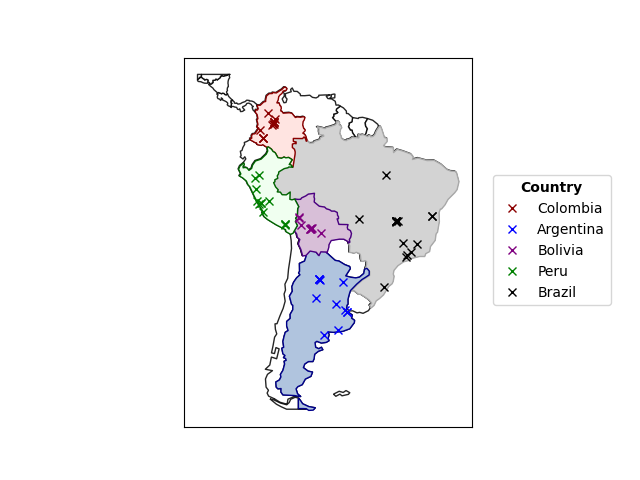

In [16]:
fig = plt.figure()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude)) #, crs="EPSG:4326" 

ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black", alpha=0.85)

world[world.name == "Brazil"].plot(edgecolor=u'darkgray', color='lightgray', ax=ax)
world[world.name == "Colombia"].plot(edgecolor=u'darkred', color='mistyrose', ax=ax)
world[world.name == "Argentina"].plot(edgecolor=u'darkblue', color='lightsteelblue', ax=ax)
world[world.name == "Bolivia"].plot(edgecolor=u'indigo', color='thistle', ax=ax)
world[world.name == "Peru"].plot(edgecolor=u'darkgreen', color='honeydew', ax=ax)

plt.plot(ax=ax)
plt.plot(gdf[gdf.Country=="Colombia"].Longitude, gdf[gdf.Country=="Colombia"].Latitude, 'x', ms=6, color="darkred", label="Colombia")
plt.plot(gdf[gdf.Country=="Argentina"].Longitude, gdf[gdf.Country=="Argentina"].Latitude, 'x', ms=6, color="blue", label="Argentina")
plt.plot(gdf[gdf.Country=="Bolivia"].Longitude, gdf[gdf.Country=="Bolivia"].Latitude, 'x', ms=6, color="purple", label="Bolivia")
plt.plot(gdf[gdf.Country=="Peru"].Longitude, gdf[gdf.Country=="Peru"].Latitude, 'x', ms=6, color="green", label="Peru")
plt.plot(gdf[gdf.Country=="Brazil"].Longitude, gdf[gdf.Country=="Brazil"].Latitude, 'x', ms=6, color="black", label="Brazil")

plt.legend(bbox_to_anchor=(1.05,0.7), title="Country", title_fontproperties={'weight':'bold'})

plt.tick_params(axis='both', which='both', 
                bottom=False, labelbottom=False, left=False, labelleft=False )
plt.savefig("Countries.png", transparent=True, bbox_inches='tight')
plt.close(fig)